# Acceleration and angular velocity of a train

- Date: August 2, 2018
- Location: A local line in Tokyo and Kanagawa

In [19]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.signal as sg

matplotlib.rcParams['figure.figsize'] = [16, 5]

SAMPLING_RATE = 80.0
GYRO_RESOLUTION = 250.0 / 32768.0
ACCEL_RESOLUTION = 2.0 / 32768.0
FILE = 'raw_data_mg09_mg10.csv'

In [27]:
df = pd.read_csv(FILE, dtype=np.int16)

gres = lambda v: v * GYRO_RESOLUTION
ares = lambda v: v * ACCEL_RESOLUTION
to_time = lambda v: v / SAMPLING_RATE
df[['gx', 'gy', 'gz']] = df[['gx', 'gy', 'gz']].apply(gres)
df[['ax', 'ay', 'az']] = df[['ax', 'ay', 'az']].apply(ares)
df[['cnt']] = df[['cnt']].apply(to_time)
df.set_index('cnt', drop=True, inplace=True)
df.head()

,gx,gy,gz,ax,ay,az
cnt,,,,,,
4.5875,-0.183105,-1.068115,3.555298,-0.013794,0.015320,0.961365
4.6000,-1.052856,0.595093,-2.426147,-0.014343,0.011841,0.965637
4.6125,-0.122070,-5.828857,-0.686646,-0.017273,0.011658,0.973877
4.6250,-0.122070,3.692627,-1.571655,-0.013000,0.011658,0.977173
4.6375,-1.480103,-4.516602,4.348755,-0.006531,0.011047,0.972534


Text(0,0.5,'Acceleration in G')

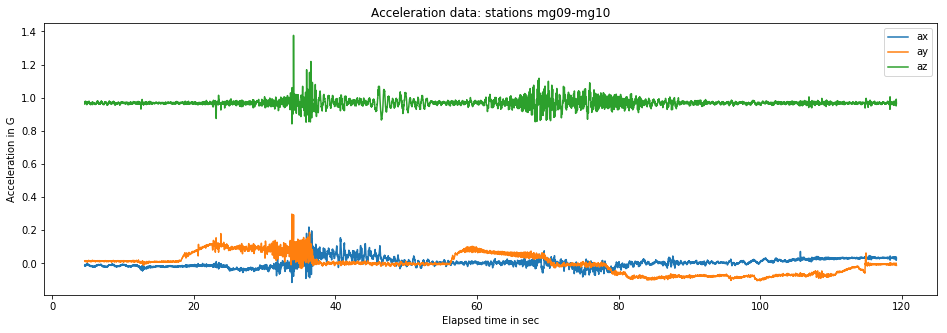

In [28]:
ax_a = df[['ax', 'ay', 'az']].plot(title='Acceleration data: stations mg09-mg10')
ax_a.set_xlabel('Elapsed time in sec')
ax_a.set_ylabel('Acceleration in G')

In [29]:
CUTOFF = 5.0
b, a = sg.butter(5, CUTOFF/SAMPLING_RATE, btype='low')
df[['ax', 'ay', 'az']] = df[['ax', 'ay', 'az']].apply(lambda row: sg.lfilter(b, a, row))

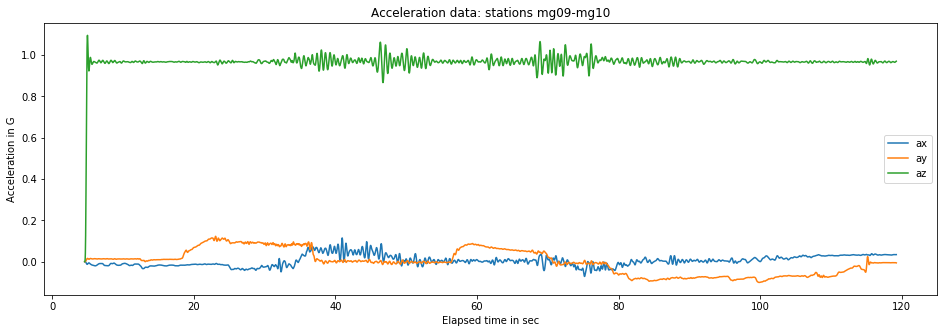

In [30]:
ax_a = df[['ax', 'ay', 'az']].plot(title='Acceleration data: stations mg09-mg10')
ax_a.set_xlabel('Elapsed time in sec')
ax_a.set_ylabel('Acceleration in G')
plt.savefig('{}_accel.jpg'.format(FILE.split('.')[0]))

Text(0,0.5,'Angular velocity in dps')

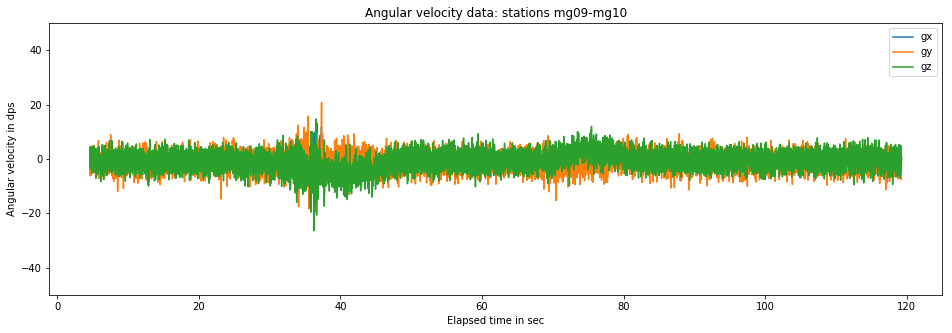

In [31]:
ax_g = df[['gx', 'gy', 'gz']].plot(ylim=[-50, 50], title='Angular velocity data: stations mg09-mg10')
ax_g.set_xlabel('Elapsed time in sec')
ax_g.set_ylabel('Angular velocity in dps')

In [32]:
CUTOFF = 0.5
b, a = sg.butter(5, CUTOFF/SAMPLING_RATE, btype='low')
df[['gx', 'gy', 'gz']] = df[['gx', 'gy', 'gz']].apply(lambda row: sg.lfilter(b, a, row))

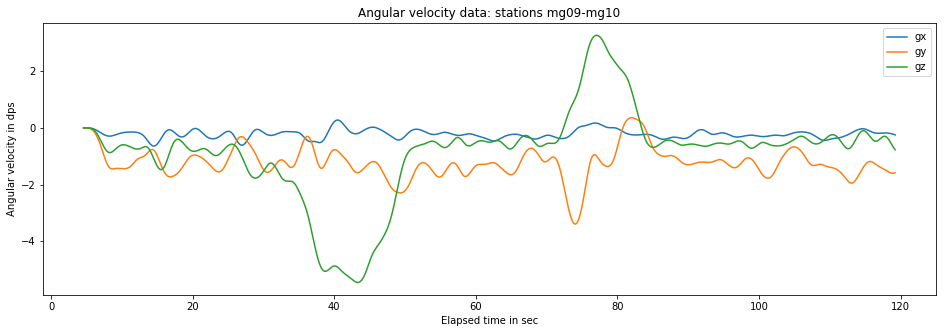

In [33]:
ax_g = df[['gx', 'gy', 'gz']].plot(title='Angular velocity data: stations mg09-mg10')
ax_g.set_xlabel('Elapsed time in sec')
ax_g.set_ylabel('Angular velocity in dps')
plt.savefig('{}_gyro.jpg'.format(FILE.split('.')[0]))

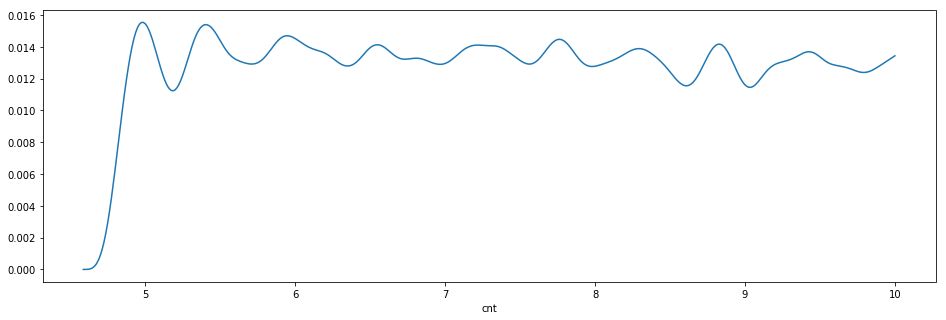

In [34]:
df['ay'][0:10].plot()

In [35]:
v = 0
OFFSET = 0.014
def integral(ay):
    global v
    v = v + ((ay - OFFSET) * 9.806 * 1 / SAMPLING_RATE) * 3600.0 / 1000.0
    return v

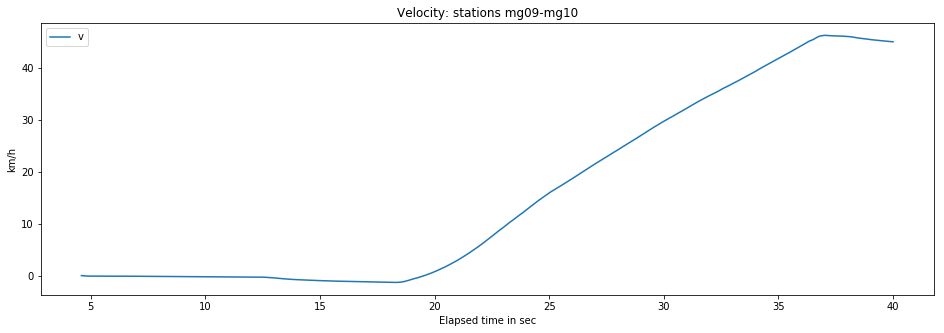

In [36]:
df_v = pd.DataFrame({'v': df['ay'].apply(integral)})
ax_a = df_v[0:40].plot(title='Velocity: stations mg09-mg10')
ax_a.set_xlabel('Elapsed time in sec')
ax_a.set_ylabel('km/h')
plt.savefig('{}_velocity.jpg'.format(FILE.split('.')[0]))